Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Привет! Спасибо за ревью. Внес правки в конце проекта.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Все статистики посчитаны корректно, молодец!
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей (объём указан в тысячах баррелей).
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

`Условия задачи:`

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [2]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

## Загрузка и подготовка данных

#### Загрузка данных

In [3]:
def get_data(filename):
    
    """
    Reads the data from the given path.
    """

    pth1 = f'/datasets/{filename}'
    pth2 = f'data/{filename}'

    if os.path.exists(pth1):
        df = pd.read_csv(pth1)
        print(f'Reading {pth1}')
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2)
        print(f'Reading {pth2}')
    else:
        print('Check the file path')

    return df

In [4]:
df1 = get_data('geo_data_0.csv')
df2 = get_data('geo_data_1.csv')
df3 = get_data('geo_data_2.csv')

dfs = [df1, df2, df3]

Reading data/geo_data_0.csv
Reading data/geo_data_1.csv
Reading data/geo_data_2.csv


#### Проверка на наличие пропусков и дубликатов

In [5]:
i = 1

for df in dfs:
    print()
    print(f'dataframe {i}')
    print()
    print(df.info())
    print()
    i += 1


dataframe 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


dataframe 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


dataframe 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
D

In [6]:
i = 1

for df in dfs:
    print(f'dataframe {i}')
    print(df.duplicated().sum())
    print()
    i += 1

dataframe 1
0

dataframe 2
0

dataframe 3
0



> Дубликаты и пропуски отстутствуют

> Все признаки численные, поэтому кодирование данных не требуется

#### Проверка на мультиколлинеарные признаки

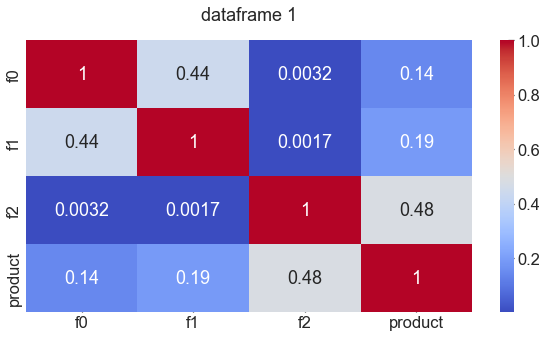

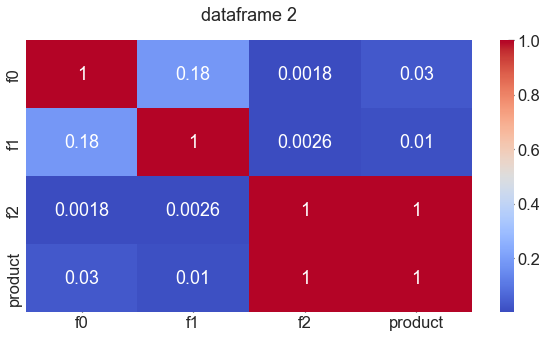

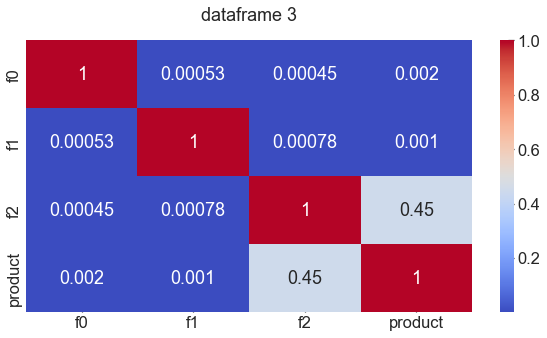

In [7]:
i = 1

for df in dfs:
    fig, ax = plt.subplots(figsize=(10, 5))
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(f'dataframe {i}', y=1.05)

    i += 1

> Для всех трех регионов наблюдается повышенная корреляция между признаками `f0` и `f1`. Кроме того, есть корреляция между признаком `f2` и целевой переменной `product`. В обоих случаях корреляция не превышает значения `0.5`, поэтому не может быть определена как сильная.

/tmp/ipykernel_79/1247675059.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)


******************************
dataframe 1


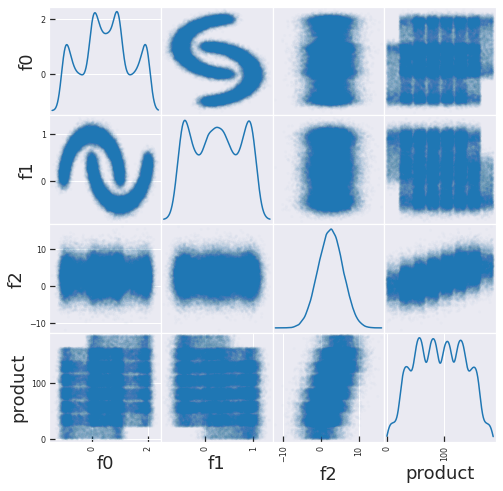

/tmp/ipykernel_79/1247675059.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)


******************************
dataframe 2


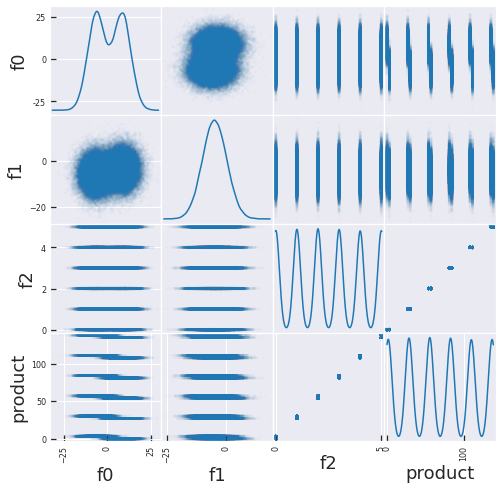

/tmp/ipykernel_79/1247675059.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)


******************************
dataframe 3


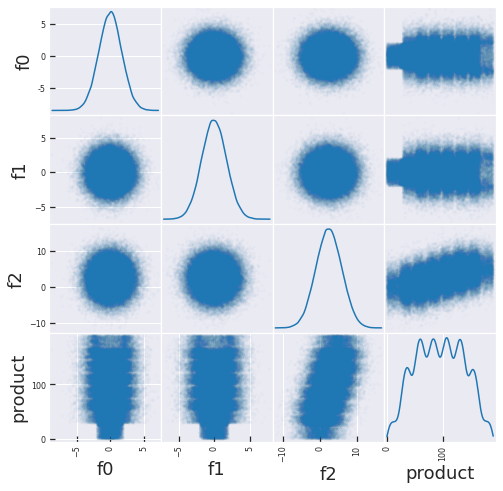

In [7]:
i = 1

for df in dfs:
    fig, ax = plt.subplots(figsize=(8, 8))
    # Create scatter matrix
    pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)

    print('*' * 30)
    print(f'dataframe {i}')
    i += 1
    plt.show()

> На диаграммах рассеяния признаков наблюдаются приведения и галактики, но винить их за это нельзя: данные синтетические

> Подозритлеьно, что для первого региона два нецелевых признака из трех имеют мультимадальное распределение, в то время как для третьего $-$ ни одного

> Подозрительно, в данных по второму региону относительно мало шума

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения и корреляции были визуализированы!
</div>

## Обучение и проверка модели

#### Разбиение

In [8]:
features_1 = df1.drop(columns=['product', 'id'])
target_1 = df1['product']

features_2 = df2.drop(columns=['product', 'id'])
target_2 = df2['product']

features_3 = df3.drop(columns=['product', 'id'])
target_3 = df3['product']

In [9]:
def split_data(features, target):
    """
    Splits the data into training and test sets.
    """

    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)

    return X_train, X_valid, y_train, y_valid

In [10]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(features_1, target_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(features_2, target_2)
features_train_3, features_valid_3, target_train_3, target_valid_3 = split_data(features_3, target_3)

In [11]:
print('Split check')
print()
print(f'Train samples contain {len(features_train_1) / len(df1):.0%} of the data')
print(f'Validation samples contain {len(features_valid_1) / len(df1):.0%} of the data')

Split check

Train samples contain 75% of the data
Validation samples contain 25% of the data


#### Масштабирование

In [12]:
def scale_data(X_train, X_valid):
    """
    Scales the data.
    """

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_valid = scaler.transform(X_valid)

    return X_train, X_valid

features_train_1, features_valid_1 = scale_data(features_train_1, features_valid_1)
features_train_2, features_valid_2 = scale_data(features_train_2, features_valid_2)
features_train_3, features_valid_3 = scale_data(features_train_3, features_valid_3)

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что scaler был обучен только на тренировочной части данных!
</div>

#### Обучение модели

In [13]:
def train_evaluate(features_valid, target_valid):
    """
    Trains and evaluates the model.
    """    

    model = LinearRegression()
    model.fit(features_valid, target_valid)

    predictions = model.predict(features_valid)
    rmse = np.sqrt(mse(target_valid, predictions))

    print(f'RMSE: {rmse:.2f}')
    print(f'Predicted mean: {np.mean(predictions):.2f} thousand barrels per well')

    return pd.Series(predictions)

In [14]:
predictions_valid_1 = train_evaluate(features_valid_1, target_valid_1)

RMSE: 37.75
Predicted mean: 92.33 thousand barrels per well


In [15]:
predictions_valid_2 = train_evaluate(features_valid_2, target_valid_2)

RMSE: 0.89
Predicted mean: 68.73 thousand barrels per well


In [16]:
predictions_valid_3 = train_evaluate(features_valid_3, target_valid_3)

RMSE: 40.14
Predicted mean: 95.15 thousand barrels per well


> Данные для второго региона наимение шумные, метрики качества лучше, чем для других регионов

> Среднее предсказаннре значение запаса сырья сопоставимо для первого и третьего региона. Для второго региона значение меньше примерно на 25%.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## Подготовка к расчёту прибыли

In [17]:
# Number of all dots
N_ALL_DOTS = 500
# Number of best dots
N_BEST_DOTS = 200

# In rubles
MINING_BUDGET = 1e10
BURREL_PRICE = 450

THRESH_PROB = .025

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что в названиях константных переменных использовались только большие буквы!
</div>

#### Объем сырья для безубыточной разработки новой скважины

In [18]:
break_even_volume = MINING_BUDGET / BURREL_PRICE / 1000 / N_BEST_DOTS

print(f'Для безубыточной разработки новой скважины объем сырья должен составлять {break_even_volume:.0f} тыс. баррелей')

Для безубыточной разработки новой скважины объем сырья должен составлять 111 тыс. баррелей


> Требуемый объем сырья для безубыточной разработки выше среднего на 20% - 40%

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

In [19]:
def profit(predictions, targets, n_dots=N_BEST_DOTS):

    """
    Calculates the profit from the best `n_dots` wells.
    """
    # targets = targets.reset_index(drop=True)

    predictions_sorted = predictions.sort_values(ascending=False)
    best_ids = predictions_sorted[:n_dots].index

    best_targets = targets.loc[best_ids]
    best_product_mean = best_targets.mean()

    profit = (best_product_mean - break_even_volume) * 1000 * BURREL_PRICE * N_BEST_DOTS

    return profit

In [20]:
best_profit_1 = profit(predictions_valid_1, target_valid_1.reset_index(drop=True))
print(f'Profit: {best_profit_1:.2e} rubles')

Profit: 3.30e+09 rubles


In [21]:
best_profit_2 = profit(predictions_valid_2, target_valid_2.reset_index(drop=True))
print(f'Profit: {best_profit_2:.2e} rubles')

Profit: 2.42e+09 rubles


In [22]:
best_profit_3 = profit(predictions_valid_3, target_valid_3.reset_index(drop=True))
print(f'Profit: {best_profit_3:.2e} rubles')

Profit: 2.58e+09 rubles


<div class="alert alert-block alert-success">
<b>Успех:</b> Верно.
</div>

## Расчёт прибыли и рисков 

#### Распределение прибыли

In [23]:
def bootstrap_profit(predictions, targets, n_iter=1000):

    """
    Calculates profit distribution using bootstrap.
    """

    predictions = predictions.reset_index(drop=True)
    targets = targets.reset_index(drop=True)

    profits = []

    state = np.random.RandomState(12345)

    for i in range(n_iter):
        
        predict_sample = predictions.sample(n=N_ALL_DOTS, replace=True, random_state=state)
        target_sample = targets.loc[predict_sample.index]

        profits.append(profit(predict_sample, target_sample))

    profits = pd.Series(profits)
    profits_mean = profits.mean()
    profits_interval = [profits.quantile(q=.025), profits.quantile(q=.975)]

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.hist(profits, bins=50, alpha=.4)
    ax.hist(profits, bins=50, histtype='step', lw=2, color='navy', alpha=.5)
    ax.axvline(profits_mean, color='r', lw=3, label='mean')
    ax.axvline(profits_interval[0], color='g', lw=2, ls='--', label='2.5% quantile')
    ax.axvline(profits_interval[1], color='g', lw=2, ls='--', label='97.5% quantile')
    ax.axvline(0, color='k', lw=2)
    ax.legend()
    plt.show()

    return profits, profits_mean, profits_interval

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>

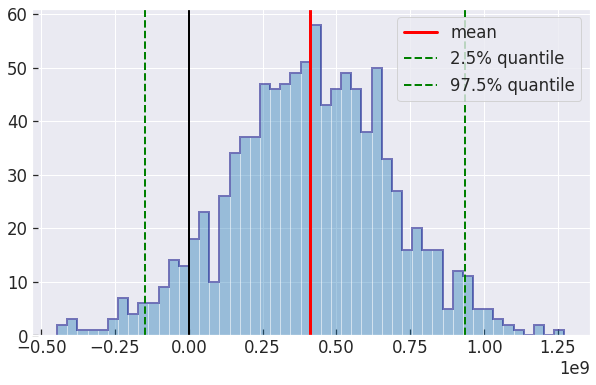

In [24]:
profits_1, profits_mean_1, profits_interval_1 = bootstrap_profit(predictions_valid_1, target_valid_1)

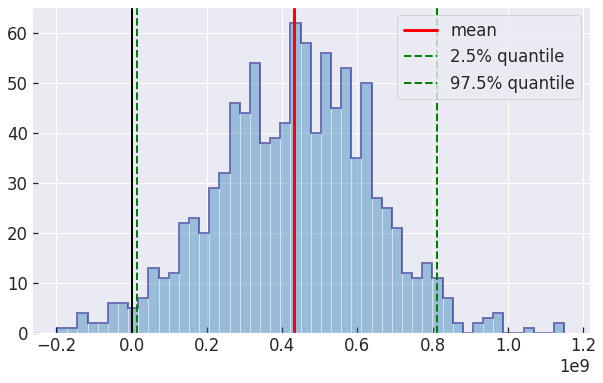

In [25]:
profits_2, profits_mean_2, profits_interval_2 = bootstrap_profit(predictions_valid_2, target_valid_2)

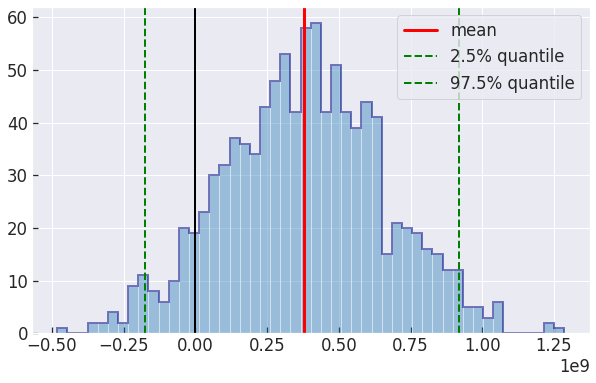

In [26]:
profits_3, profits_mean_3, profits_interval_3 = bootstrap_profit(predictions_valid_3, target_valid_3)

#### Сравнение вероятности убытков с пороговой

In [29]:
i = 1

for region_profit in [profits_1, profits_2, profits_3]:

    risk = np.sum(region_profit < 0) / len(region_profit)
    
    if risk < THRESH_PROB:
        message = f'Вероятность убытков в регионе {i}: {risk:.1%}; ожидаемая средняя прибыль: {region_profit.mean():.2e} руб.'
        print()
        print()
        print('-' * int(len(message) / 1.1))
        print(message)
        print('-' * int(len(message) / 1.1))
        print()
        print()
        
    else:
        print(f'Вероятность убытков в регионе {i}: {risk:.1%}; ожидаемая средняя прибыль: {region_profit.mean():.2e} руб.')
        
    i += 1

Вероятность убытков в регионе 1: 7.0%; ожидаемая средняя прибыль: 4.11e+08 руб.


-----------------------------------------------------------------------
Вероятность убытков в регионе 2: 2.2%; ожидаемая средняя прибыль: 4.31e+08 руб.
-----------------------------------------------------------------------


Вероятность убытков в регионе 3: 8.5%; ожидаемая средняя прибыль: 3.80e+08 руб.


> Второй регион подходит для разработки, поскольку вероятность убытков в нем менее 2.5%

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Нужно еще вывести среднее, а также явно посчитать риск убытков для каждого региона.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> добавил средний доход и риски для каждого региона
</div>

## Вывод

- На основе информации о пробах нефти в трёх регионах была построена модель машинного обучения, позволяющая определить регион, где добыча принесёт наибольшую прибыль

- Согласно прогнозу модели, наиболее подходящим для разработки является второй регион, поскольку вероятность убытков в нем менее 2.5%

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [X]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован